In [1]:
def function1(input1):
    return input1+ " from first function"

In [2]:
def function2(input2):
    return input2+ " from second function"

In [3]:
def function3(input3):
    pass

In [4]:
function1("rohit")

'rohit from first function'

In [5]:
function2("srivas")

'srivas from second function'

In [14]:
from langgraph.graph import StateGraph

In [16]:
workflow1=StateGraph(dict)

In [18]:
workflow1.add_node("fun1",function1)

In [19]:
workflow1.add_node("fun2",function2)

In [20]:
workflow1.add_edge("fun1","fun2")

In [21]:
workflow1.set_entry_point("fun1")

In [22]:
workflow1.set_finish_point("fun2")

In [23]:
app=workflow1.compile()

In [24]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

In [25]:
from IPython.display import display,Image

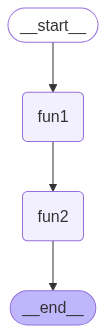

In [27]:
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
app.invoke("Hi myself rohit")

'Hi myself rohit from first function from second function'

In [31]:
for output in app.stream("Hi myself rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from fun1
_______
Hi myself rohit from first function


here is output from fun2
_______
Hi myself rohit from first function from second function




In [33]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')

In [34]:
model.invoke("Hi myself rohit")

AIMessage(content='Hello Rohit!  How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--f9831aba-8a11-47f0-965f-6f231c953f16-0', usage_metadata={'input_tokens': 4, 'output_tokens': 12, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})

In [37]:
def llm(input): 
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

In [40]:
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated text is {token_number}"

In [42]:
workflow2=StateGraph(dict)
workflow2.add_node("llm",llm)
workflow2.add_node("token_counter",token_counter)

In [43]:
workflow2.add_edge("llm","token_counter")
workflow2.set_entry_point("llm")
workflow2.set_finish_point("token_counter")

In [44]:
app2=workflow2.compile()
app2.invoke("Hi myself rohit")

'total token number in the generated text is 8'

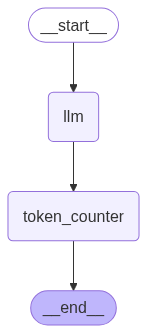

In [45]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [47]:
app2.invoke("explain transformers in nlp")

'total token number in the generated text is 600'

In [50]:
for output in app2.stream("explain transformers in nlp"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Transformers are a type of neural network architecture that have revolutionized Natural Language Processing (NLP).  Unlike previous recurrent neural networks (RNNs) like LSTMs and GRUs, transformers don't process sequences sequentially, allowing for much greater parallelization and efficiency, especially on long sequences.  Their core innovation lies in the **self-attention mechanism**.

Here's a breakdown:

**1. The Self-Attention Mechanism:**

This is the heart of the transformer.  Instead of processing words one by one, self-attention allows the model to consider the relationship between *all* words in a sentence simultaneously.  For each word, it calculates a "weighted sum" of all other words in the sentence, where the weights represent the importance of each word in relation to the current word.

This is done through three learned matrices:

* **Query (Q):** Represents the current word's "query" – what information it's looking for.
* **Key (K):** Re